In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_excel('/kaggle/input/customer-churn-large-dataset/customer_churn_large_dataset.xlsx')
dataset

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# DATA PREPROCESSING

## As observed from the dataset clearly that customerId and names are of no use to comment anything on the churn so we drop them

In [3]:
dataset=dataset.drop(['CustomerID','Name'],axis=1)
dataset.head()


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Age

In [4]:
dataset['Age'].unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23])

## Therefore, Age column does not require pre processing in this case


## Gender
### We can apply label encoding here to get numeric data instead of male female

In [5]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
dataset['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

### this also shows that we have kind of balanced data

### Applying Label Encoding where 1 stands for male and 0 for female

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender']= le.fit_transform(dataset['Gender'])
dataset.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


In [8]:
dataset.tail()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,33,1,Houston,23,55.13,226,1
99996,62,0,New York,19,61.65,351,0
99997,64,1,Chicago,17,96.11,251,1
99998,51,0,New York,20,49.25,434,1
99999,27,0,Los Angeles,19,76.57,173,1


## Location

In [9]:
dataset['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

## Therefore no missing values to handle so we can directly apply encoding (OneHotEncoding or LabelEncoding)

#### 0-Chicago 
#### 1-Houston 
#### 2-Los Angeles
#### 3-Miami
#### 4-New York

In [10]:
le1 = LabelEncoder()
dataset['Location']= le1.fit_transform(dataset['Location'])
dataset.head()


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


## Subscription Length Months 

In [11]:
dataset['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

### Therefore, subscription lenghth months column does not require pre processing in this case

## Monthly Bill 

In [12]:
dataset['Monthly_Bill'].value_counts()

84.37     34
61.99     29
38.26     28
66.38     28
56.17     28
          ..
77.04      4
91.04      3
64.01      3
36.55      3
100.00     3
Name: Monthly_Bill, Length: 7001, dtype: int64

In [13]:
dataset['Monthly_Bill'].unique()

array([73.36, 48.76, 85.47, ..., 75.21, 41.98, 83.55])

In [14]:
dataset['Monthly_Bill'].isnull().sum()

0

### Therefore, no null values in this column too

## Total Usage GB

In [15]:
dataset['Total_Usage_GB'].unique()

array([236, 172, 460, 297, 266, 456, 269, 396, 150, 383, 442, 295, 148,
       239, 233, 231, 198, 354, 429, 243, 270, 389, 226, 393,  89, 183,
       135, 185, 151, 115, 194, 278, 423, 202, 495, 162, 101, 294, 122,
       305, 212, 220, 253, 411, 447, 218, 221, 166,  64,  67, 391, 232,
       298, 334, 326, 459, 371, 299, 376, 214, 329,  50, 444, 113,  76,
       134, 184, 319, 235,  85, 332,  73, 369, 308, 446, 321,  83, 114,
       296, 102, 215, 169, 225, 140,  84, 463, 402, 468, 375, 366, 404,
       471, 204, 320, 178, 149, 361, 304, 281, 177, 117, 137, 322, 427,
       403, 237, 439, 336, 344, 288, 257, 196, 365, 419, 111, 192, 244,
       287, 395, 213, 109, 286, 283, 230, 491, 274, 335, 462, 407, 126,
       199, 351, 261, 496, 480, 400, 303, 197, 181, 474, 348, 112, 457,
        54, 397, 100, 318, 242, 327, 476, 256, 241, 466, 438,  51, 165,
       120, 493,  59, 188, 339, 167, 301, 209, 311, 190, 345, 284, 390,
        72, 258, 358, 136, 280,  55, 309, 388,  52, 478, 401, 47

In [16]:
dataset['Total_Usage_GB'].isnull().sum()

0

### No null values in this too so looks like the data is cleaned now and ready to visualize and build a model on

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


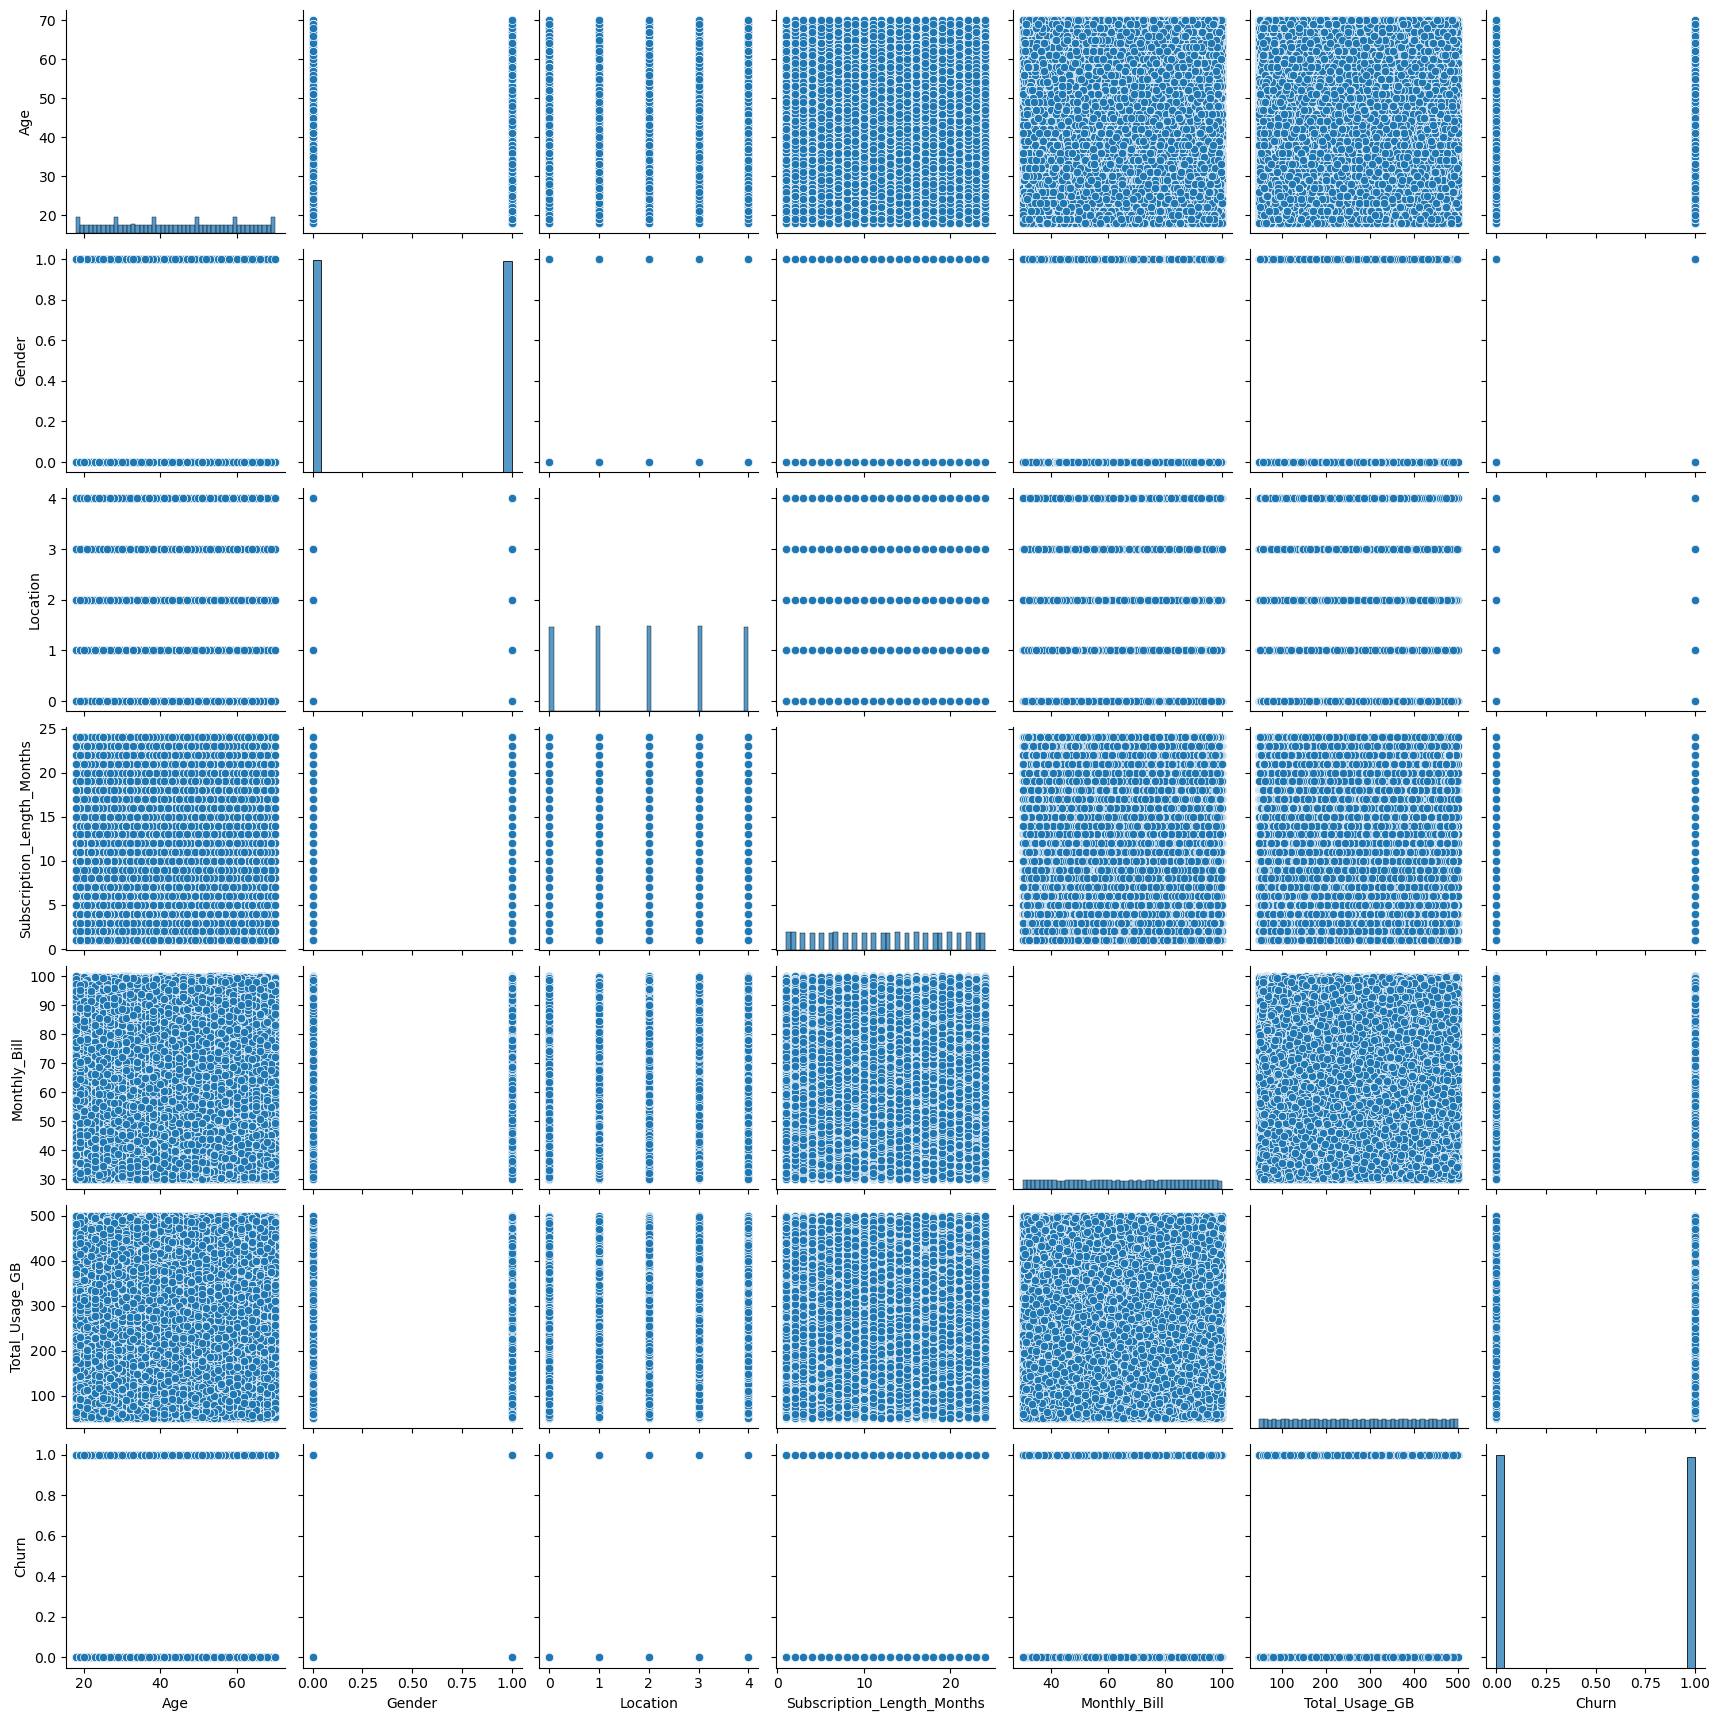

In [17]:
sns.pairplot(dataset)

<Axes: >

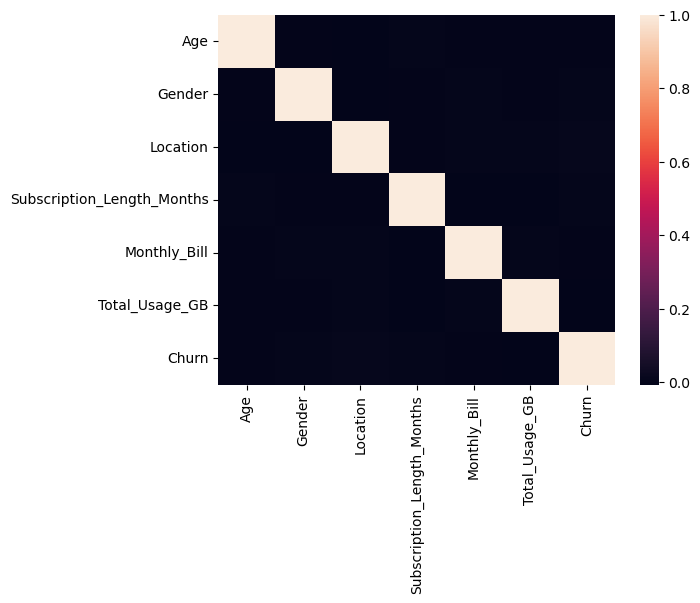

In [18]:
sns.heatmap(dataset.corr())

## The heatmap and pairplot shows no good correlation betweeen datas

(49000.0, 51000.0)

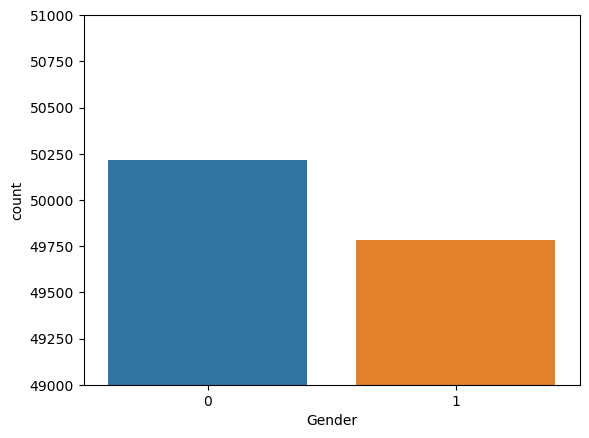

In [19]:
sns.countplot(x=dataset['Gender'])
plt.ylim(49000,51000)

(49000.0, 51000.0)

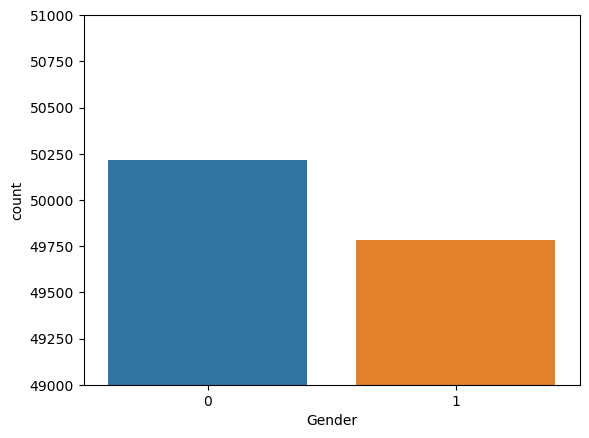

In [20]:
sns.countplot(x=dataset['Gender'])
plt.ylim(49000,51000)

(19500.0, 20300.0)

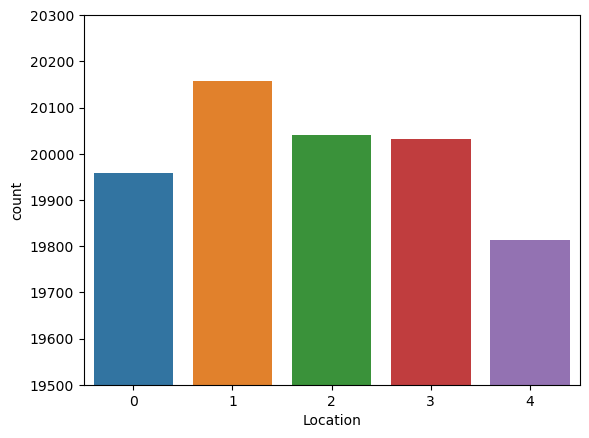

In [21]:
sns.countplot(x=dataset['Location'])
plt.ylim(19500,20300)

#### 0-Chicago 
#### 1-Houston 
#### 2-Los Angeles
#### 3-Miami
#### 4-New York

## Assigning the dependent and independent variables

In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
print(X)

[[ 63.     1.     2.    17.    73.36 236.  ]
 [ 62.     0.     4.     1.    48.76 172.  ]
 [ 24.     0.     2.     5.    85.47 460.  ]
 ...
 [ 64.     1.     0.    17.    96.11 251.  ]
 [ 51.     0.     4.    20.    49.25 434.  ]
 [ 27.     0.     2.    19.    76.57 173.  ]]


In [24]:
print(y)

[0 0 0 ... 1 1 1]


## Splitting the dataset into training set and test set

### Keeping the test size 20% of the entire data 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Trying some Classification models like logistic, knn,kernel svm)


### Doing feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### storing predicted values in y_pred

In [28]:
y_pred = classifier.predict(X_test)

### Providing classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60     10020
           1       0.51      0.26      0.34      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
accuracy_score(y_test, y_pred)

[[7515 2505]
 [7416 2564]]


0.50395

### K FOLD CROSS VALIDATION(Logistic regression)

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.04 %
Standard Deviation: 0.46 %


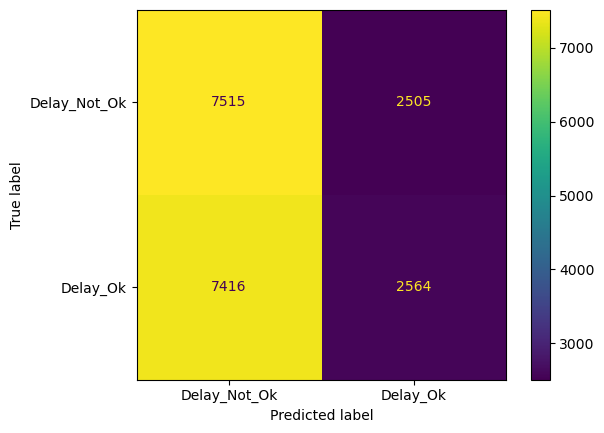

In [32]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])
cm_display.plot()
plt.show()

#### Therefore, we see our logistic model provides us a accuracy of only 50.04%

## Artificial nueral network

In [33]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [34]:
ann = tf.keras.models.Sequential()

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6946 - accuracy: 0.4995
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5037
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 4/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5047
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5044
Epoch 6/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5038
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5072
Epoch 8/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5062
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5070
Epoch 10/100
2500/2500 [==============================] - 4s 2ms/step - l

In [40]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 1ms/step
[[0 1]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 0]
 [1 0]]


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5762 4258]
 [5676 4304]]


0.5033

# XGBOOST

In [42]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[5226 4794]
 [5180 4800]]


0.5013

### K FOLD CROSS VALIDATION(xgBoost)

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.32 %
Standard Deviation: 0.67 %


## Applying Grid Search to find the best model and the best parameters


In [45]:
#from sklearn.model_selection import GridSearchCV
#parameters = [{'C': [0.25, 0.5, 0.75, 1], 'booster': ['gblinear']},
 #             {'C': [0.25, 0.5, 0.75, 1], 'booster': ['dart'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
#grid_search = GridSearchCV(estimator = classifier1,
 #                          param_grid = parameters,
  #                         scoring = 'accuracy',
   #                        cv = 10,
    #                       n_jobs = -1)
#grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)

# CatBoost

In [46]:
from catboost import CatBoostClassifier
classifier2 = CatBoostClassifier()
classifier2.fit(X_train, y_train)

Learning rate set to 0.06692
0:	learn: 0.6930885	total: 70.6ms	remaining: 1m 10s
1:	learn: 0.6930445	total: 83ms	remaining: 41.4s
2:	learn: 0.6930345	total: 91ms	remaining: 30.2s
3:	learn: 0.6929860	total: 102ms	remaining: 25.5s
4:	learn: 0.6929323	total: 115ms	remaining: 22.9s
5:	learn: 0.6928713	total: 129ms	remaining: 21.4s
6:	learn: 0.6928266	total: 143ms	remaining: 20.2s
7:	learn: 0.6927816	total: 156ms	remaining: 19.3s
8:	learn: 0.6927303	total: 169ms	remaining: 18.6s
9:	learn: 0.6926814	total: 182ms	remaining: 18s
10:	learn: 0.6926485	total: 196ms	remaining: 17.6s
11:	learn: 0.6926043	total: 209ms	remaining: 17.2s
12:	learn: 0.6925628	total: 221ms	remaining: 16.8s
13:	learn: 0.6925254	total: 233ms	remaining: 16.4s
14:	learn: 0.6924874	total: 245ms	remaining: 16.1s
15:	learn: 0.6924408	total: 258ms	remaining: 15.9s
16:	learn: 0.6924058	total: 271ms	remaining: 15.7s
17:	learn: 0.6923464	total: 284ms	remaining: 15.5s
18:	learn: 0.6923084	total: 295ms	remaining: 15.2s
19:	learn: 0.6

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[5450 4570]
 [5364 4616]]


0.5033

### K FOLD CROSS VALIDATION(CatBoost)

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.32 %
Standard Deviation: 0.67 %
